##### * Importing some useful libraries

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [ ]:
# phishing_data1 = pd.read_csv('phishing_urls.csv',usecols=['domain','label'],encoding='latin1', error_bad_lines=False)
# phishing_data1.columns = ['URL','Label']
# phishing_data2 = pd.read_csv('phishing_data.csv')
# phishing_data2.columns = ['URL','Label']
# phishing_data3 = pd.read_csv('phishing_data2.csv')
# phishing_data3.columns = ['URL','Label']

In [ ]:
# for l in range(len(phishing_data1.Label)):
#     if phishing_data1.Label.loc[l] == '1.0':
#         phishing_data1.Label.loc[l] = 'bad'
#     else:
#         phishing_data1.Label.loc[l] = 'good'

* **Concatenate All datasets in one.**

In [ ]:
# frames = [phishing_data1, phishing_data2, phishing_data3]
# phishing_urls = pd.concat(frames)

In [ ]:
# #saving dataset
# phishing_urls.to_csv(r'phishing_site_urls.csv', index = False)

* **Loading the main dataset.**

In [ ]:
phish_data = pd.read_csv('/content/phishing_site_urls.csv')

In [ ]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,Phishing
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,Phishing
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,Phishing
3,mail.printakid.com/www.online.americanexpress....,Phishing
4,thewhiskeydregs.com/wp-content/themes/widescre...,Phishing


In [ ]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,Phishing
549342,apple-checker.org/,Phishing
549343,apple-iclods.org/,Phishing
549344,apple-uptoday.org/,Phishing
549345,apple-search.info,Phishing


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549352 entries, 0 to 549351
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549352 non-null  object
 1   Label   549352 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Checking the classes are balanced or imbalances**

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

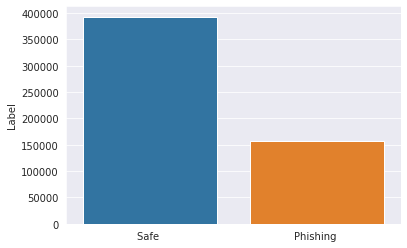

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

### Preprocessing

### we have to vectorize our URLs. 

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[1]

'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[1]) # using first row

['www',
 'dghjdgf',
 'com',
 'paypal',
 'co',
 'uk',
 'cycgi',
 'bin',
 'webscrcmd',
 'home',
 'customer',
 'nav',
 'loading',
 'php']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.1848471559999894 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
183034,encyclopedia.farlex.com/pilot+running,Safe,"[encyclopedia, farlex, com, pilot, running]"
542469,185.82.217.229/module/9079dae8e107342d8f3747fa...,Phishing,"[module, dae, e, d, f, fa, ab, a]"
260286,wn.com/Chicago_Fire_SC,Safe,"[wn, com, Chicago, Fire, SC]"
347079,goodreads.com/book/show/2411128.All_Souls_Night,Safe,"[goodreads, com, book, show, All, Souls, Night]"
188052,finance.yahoo.com/q?s=ZION,Safe,"[finance, yahoo, com, q, s, ZION]"


#### SnowballStemmer


In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 44.795126057999994 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
261995,world.mitrasites.com/imgs/athletics-at-the-197...,Safe,"[world, mitrasites, com, imgs, athletics, at, ...","[world, mitrasit, com, img, athlet, at, the, s..."
518821,mcyengineering.com/modules/webstat/deutsche_te...,Phishing,"[mcyengineering, com, modules, webstat, deutsc...","[mcyengin, com, modul, webstat, deutsch, telek..."
338071,findagrave.com/cgi-bin/fg.cgi?page=gr&GRid=693...,Safe,"[findagrave, com, cgi, bin, fg, cgi, page, gr,...","[findagrav, com, cgi, bin, fg, cgi, page, gr, ..."
149766,bleacherreport.com/articles/370142-is-the-phoe...,Safe,"[bleacherreport, com, articles, is, the, phoen...","[bleacherreport, com, articl, is, the, phoenix..."
464574,wikimapia.org/11984504/Ecole-Sup%C3%A9rieure-d...,Safe,"[wikimapia, org, Ecole, Sup, C, A, rieure, de,...","[wikimapia, org, ecol, sup, c, a, rieur, de, t..."


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.22702912700003708 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
81326,www.stephen.com/ad/ad.html,Safe,"[www, stephen, com, ad, ad, html]","[www, stephen, com, ad, ad, html]",www stephen com ad ad html
136712,rimis.lt/wp-includes,Phishing,"[rimis, lt, wp, includes]","[rimi, lt, wp, includ]",rimi lt wp includ
533432,sonaeyou1.web.fc2.com/vfzrxb9,Phishing,"[sonaeyou, web, fc, com, vfzrxb]","[sonaeyou, web, fc, com, vfzrxb]",sonaeyou web fc com vfzrxb
275092,amazon.com/Firecracker/dp/B000S57AJQ,Safe,"[amazon, com, Firecracker, dp, B, S, AJQ]","[amazon, com, firecrack, dp, b, s, ajq]",amazon com firecrack dp b s ajq
153122,brickpostreview.blogspot.com/2009/04/snitch-by...,Safe,"[brickpostreview, blogspot, com, snitch, by, n...","[brickpostreview, blogspot, com, snitch, by, n...",brickpostreview blogspot com snitch by norah m...


### Visualization 
**1. Visualize some important keys using word cloud**

In [ ]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'Phishing']
good_sites = phish_data[phish_data.Label == 'Safe']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent


**2. Visualize internal links, it will shows all redirect links.** 

#### Turn the URL’s into a Dataframe


### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
#help(CountVectorizer())

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data 

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

NameError: ignored

### Model Selection

In [ ]:
# create lr object
lr = LogisticRegression()
# from xgboost import XGBClassifier
#lr = XGBClassifier()
# from sklearn.neighbors import KNeighborsClassifier
# lr = KNeighborsClassifier
# from sklearn import svm
# lr1 = svm.SVC()
# from sklearn.ensemble import RandomForestClassifier
# lr = RandomForestClassifier()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(testX,testY)

0.9628653395272976

.*** Logistic Regression is giving 96% accuracy**

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9767216647977981
Testing Accuracy : 0.9628653395272976

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36305
        Good       0.99      0.96      0.97    101033

    accuracy                           0.96    137338
   macro avg       0.94      0.96      0.95    137338
weighted avg       0.96      0.96      0.96    137338


CONFUSION MATRIX


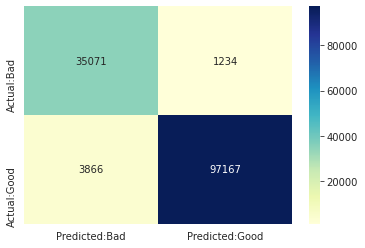

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Phishing','Safe']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(testX,testY)

0.9579650206060959

*** MultinomialNB gives us 95% accuracy**  

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738552573456242
Testing Accuracy : 0.9579650206060959

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38098
        Good       0.97      0.97      0.97     99240

    accuracy                           0.96    137338
   macro avg       0.95      0.95      0.95    137338
weighted avg       0.96      0.96      0.96    137338


CONFUSION MATRIX


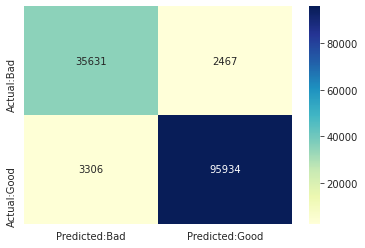

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Phishing','Safe']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

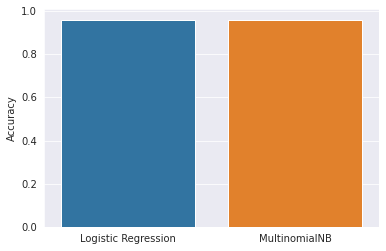

In [ ]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bo...mpty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                   

In [ ]:
pipeline_ls.score(testX,testY) 

0.9669137456494197

Training Accuracy : 0.9807118204721199
Testing Accuracy : 0.9669137456494197

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36759
        Good       0.99      0.97      0.98    100579

    accuracy                           0.97    137338
   macro avg       0.95      0.97      0.96    137338
weighted avg       0.97      0.97      0.97    137338


CONFUSION MATRIX


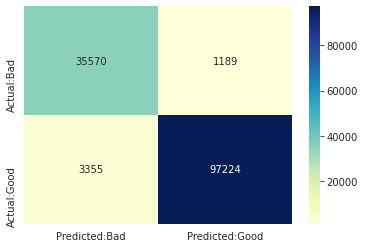

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Phishing','Safe']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('/content/phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9669137456494197


In [ ]:
# * Bad links => this are phishing sites
# yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
# fazan-pacir.rs/temp/libraries/ipad
# www.tubemoviez.exe
# svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

# * Good links => this are not phishing sites
# www.youtube.com/
# youtube.com/watch?v=qI0TQJI3vdU
# www.retailhellunderground.com/
# restorevisioncenters.com/html/technology.html


# youtube.com/

In [ ]:
import pickle
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['coursera.org/specializations/learn-sql-basics-data-science','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('/content/phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print('This is a '+result + 'Site')
print("*"*300)
print('This is a '+result2 + 'Site')

['This is a Phishing Site' 'This is a Phishing Site'
 'This is a Phishing Site' 'This is a Phishing Site']
************************************************************************************************************************************************************************************************************************************************************************************************************
['This is a Safe Site' 'This is a Safe Site' 'This is a Safe Site'
 'This is a Safe Site']


In [ ]:
import pickle
site1 = str(input("Please enter the site without the 'http' and 'www' part (eg- youtube.com/):\n")).lower()
predict1 = []
loaded_model = pickle.load(open('/content/phishing.pkl', 'rb'))
predict1.append(site1)
result = loaded_model.predict(predict1)
if result == 'Phishing ':
  if (predict1[0][4]) == 's':
    print("Safe")
  else:
    print('Phising')
else:
  print(result)


Please enter the site without the 'http' and 'www' part (eg- youtube.com/):
https://www.youtube.com/watch?v=N69ZEImqQ60&list=RDDhD-NhTBO1A&index=3
['Safe ']
